Note: this notebook is used as a playground for testing scripts, algos, results, EDA, etc. It will not ve refreshed by any shceduled job.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import bt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
import plotly.graph_objects as go
import yfinance as yf
import talib
import datetime
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
import chewie_pack

## Importing Dataset

In [2]:
df = pd.read_csv('ticker_data.csv', index_col='Date', parse_dates=True)
indicators = chewie_pack.indicators

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24632 entries, 2014-09-17 to 2022-02-07
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            24632 non-null  float64
 1   High            24632 non-null  float64
 2   Low             24632 non-null  float64
 3   Close           24632 non-null  float64
 4   Volume          24632 non-null  int64  
 5   Dividends       24632 non-null  float64
 6   Stock Splits    24632 non-null  float64
 7   ticker          24632 non-null  object 
 8   nom_change      24622 non-null  float64
 9   pct_change      24622 non-null  float64
 10  SMA_10          24542 non-null  float64
 11  SMA_50          24142 non-null  float64
 12  EMA_10          24542 non-null  float64
 13  EMA_50          24142 non-null  float64
 14  ADX_10          23642 non-null  float64
 15  ADX_50          23642 non-null  float64
 16  RSI_10          24532 non-null  float64
 17  RSI_50        

In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'ticker', 'nom_change', 'pct_change', 'SMA_10', 'SMA_50', 'EMA_10',
       'EMA_50', 'ADX_10', 'ADX_50', 'RSI_10', 'RSI_50', 'BB_10_upper',
       'BB_10_middle', 'BB_10_lower', 'BB_50_upper', 'BB_50_middle',
       'BB_50_lower', 'sg_AboveSMA_10', 'sg_AboveSMA_50', 'sg_AboveEMA_10',
       'sg_AboveEMA_50', 'sg_ADX_10', 'sg_ADX_50', 'sg_RSI_10', 'sg_RSI_50',
       'sg_BB_10', 'sg_BB_50'],
      dtype='object')

In [5]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,nom_change,pct_change,SMA_10,...,ADX_10,ADX_50,RSI_10,RSI_50,BB_10_upper,BB_10_middle,BB_10_lower,BB_50_upper,BB_50_middle,BB_50_lower
count,24632.000000,24632.000000,24632.000000,24632.000000,2.463200e+04,24632.000000,24632.000000,24622.000000,24622.000000,24542.000000,...,23642.000000,23642.000000,24532.000000,24132.000000,24542.000000,24542.000000,24542.000000,24142.000000,24142.000000,24142.000000
mean,1730.683424,1769.145618,1688.411293,1732.441134,3.008957e+09,0.001639,0.000772,2.172250,0.184820,1728.538237,...,14.305036,14.305050,54.256085,53.581483,1861.003008,1728.538248,1596.073487,2039.636835,1711.611274,1383.585713
std,6316.876606,6486.925873,6123.816199,6321.021440,8.882706e+09,0.025998,0.062104,256.239391,3.521848,6300.232995,...,6.176415,6.176426,14.921370,7.175468,6874.048340,6300.233001,5740.933598,7615.167840,6209.394957,4876.837566
min,0.023954,0.025993,0.019130,0.023961,7.922000e+03,0.000000,0.000000,-7554.040000,-42.350000,0.030000,...,3.640650,3.640000,7.230000,29.340000,0.028709,0.026482,-0.062973,0.040473,0.032968,-21.469339
25%,38.156251,38.742014,37.612020,38.233974,5.671636e+06,0.000000,0.000000,-1.090000,-0.910000,38.470000,...,9.478150,9.480000,43.680000,48.590000,40.400132,38.470221,36.213466,43.348045,39.318416,34.513600
50%,162.044038,163.994532,159.865808,161.863373,5.533080e+07,0.000000,0.000000,0.010000,0.090000,161.640000,...,13.122630,13.120000,54.260000,53.370000,169.768936,161.641884,153.884861,185.976410,161.196206,140.219444
75%,1080.174988,1095.482483,1065.309998,1080.057495,2.434828e+09,0.000000,0.000000,1.837500,1.160000,1082.682500,...,17.532988,17.530000,65.060000,58.182500,1133.055474,1082.683243,1024.599411,1195.909925,1084.643546,979.882693
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.750000,7.000000,7293.020000,136.680000,64698.850000,...,42.958320,42.960000,97.310000,84.980000,69025.163291,64698.849609,61368.912953,72219.851101,60801.771016,54468.973445


## Testing strategies

In [6]:
#df_test = df[df.index.year>=2020]
#df_test = df_test[df_test.ticker=='MSFT']
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]

<AxesSubplot:title={'center':'Backtest result'}>

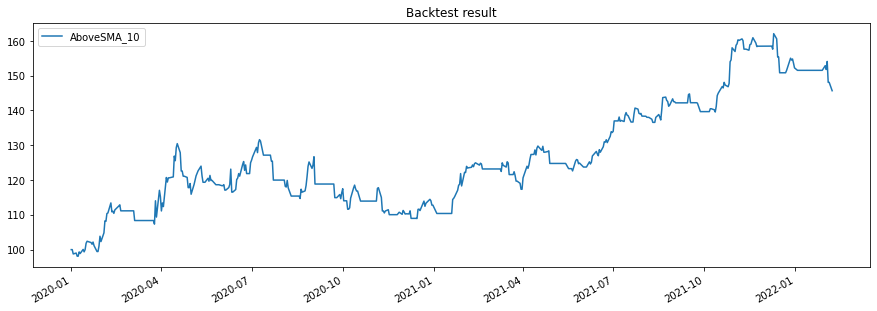

In [7]:
#df_test = df[df.ticker=='MSFT']['Close'].to_frame()
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]
price = df_test.Close.to_frame(name='Close')
ref = df_test.SMA_10.to_frame(name='Close')

# Define the signal-based strategy
bt_strategy = bt.Strategy('AboveSMA_10',
                        [bt.algos.SelectWhere( price > ref ),
                        bt.algos.WeighEqually(),
                        bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')

# !!!!Reminder to correct all the sg_MA_x

<AxesSubplot:title={'center':'Backtest result'}>

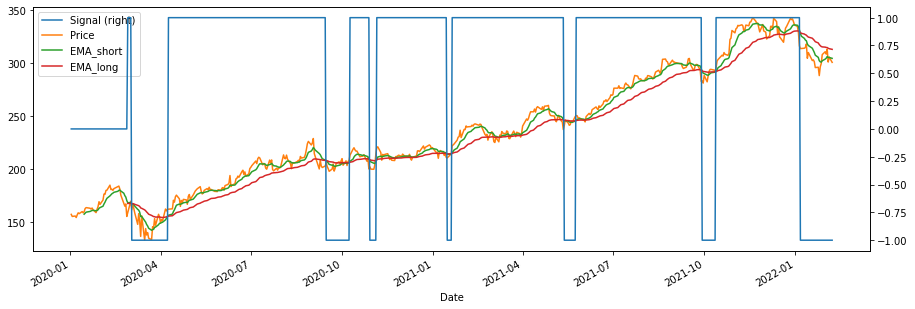

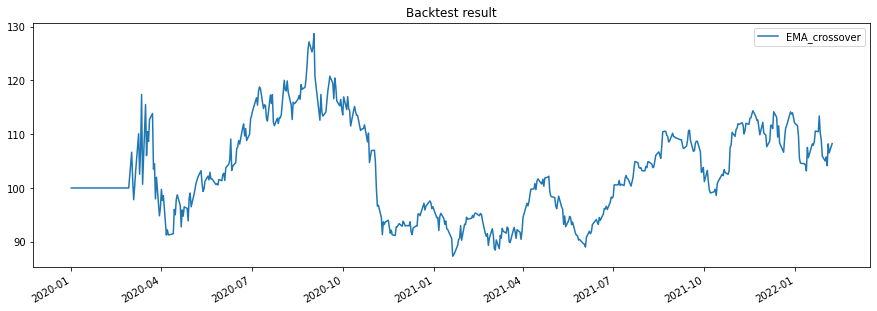

In [8]:
#### MA crossover strategy
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]
price = df_test.Close.to_frame(name='Close')

# Calculate the indicators
EMA_short = talib.EMA(df_test['Close'], timeperiod=10).to_frame(name='Close')
EMA_long = talib.EMA(df_test['Close'], timeperiod=40).to_frame(name='Close')

# Create the signal DataFrame
signal = EMA_long.copy()
signal[EMA_long.isnull()] = 0
# Construct the signal
signal[EMA_short > EMA_long] = 1
signal[EMA_short < EMA_long] = -1

# Plot the signal, price and MAs
combined_df = bt.merge(signal, price, EMA_short, EMA_long)
combined_df.columns = ['Signal', 'Price', 'EMA_short', 'EMA_long']
combined_df.plot(secondary_y=['Signal'])

# Define the strategy
bt_strategy = bt.Strategy('EMA_crossover', 
                [bt.algos.WeighTarget(signal), 
                bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')

In [9]:
signal.reset_index().Close.value_counts()

 1.0    399
-1.0     92
 0.0     39
Name: Close, dtype: int64

In [10]:
df_test.sg_RSI_10.apply(chewie_pack.BHS_to_sg).value_counts()

 0    495
-1     34
 1      1
Name: sg_RSI_10, dtype: int64

In [11]:
df_test.sg_RSI_10.value_counts()

hold    495
sell     34
buy       1
Name: sg_RSI_10, dtype: int64

<AxesSubplot:title={'center':'Backtest result'}>

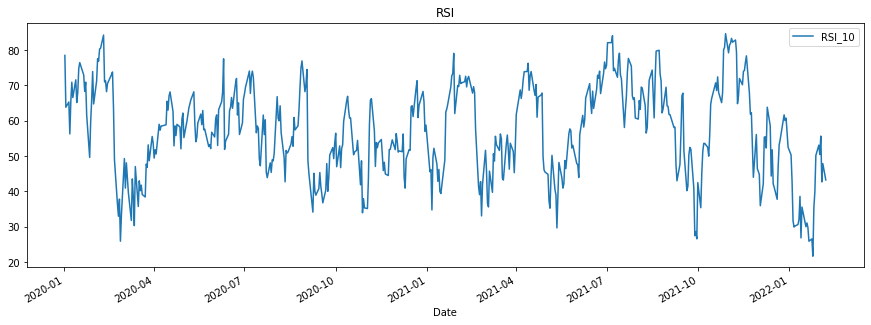

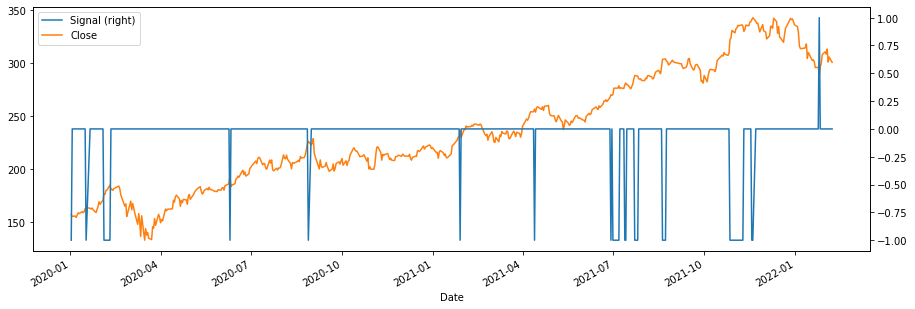

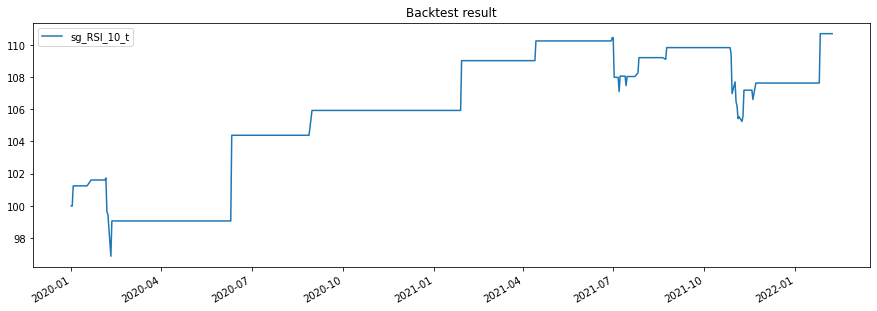

In [12]:
#### RSI-based Mean Reversion Strategy
df_test = df.loc[(df.ticker=='MSFT') & (df.index>'2020-01-01')] #& (df.index<'2022-02-04')]
close = df_test.Close.to_frame(name='Close')
sg_RSI_10_t = df_test.sg_RSI_10.to_frame(name='Close')

# Construct the signal
signal = df_test.sg_RSI_10.apply(chewie_pack.BHS_to_sg).to_frame(name='Close')

df_test.RSI_10.to_frame().plot()
plt.title('RSI')

# Plot the signal, price and MAs
combined_df = bt.merge(signal, close, sg_RSI_10_t)
combined_df.columns = ['Signal', 'Close', 'sg_RSI_10_t']
combined_df.plot(secondary_y=['Signal'])

# Define the strategy
bt_strategy = bt.Strategy('sg_RSI_10_t', 
                [bt.algos.WeighTarget(signal), 
                bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, close)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')


In [13]:
#### Benchmarking example
def buy_and_hold(df, ticker, signal_name, start='2020-01-01', end='2021-12-31'):
    # Get the data
    close = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)]['Close'].to_frame()
    # Define the benchmark strategy
    bt_strategy = bt.Strategy(signal_name,
        [bt.algos.RunOnce(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, close)

In [14]:
#### Strategy Optimization example
def signal_rever(df, ticker, signal_name, start='2020-01-01', end='2021-12-31'):
    close = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)]['Close'].to_frame()
    signal = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)][signal_name]
    signal = signal.apply(chewie_pack.BHS_to_sg).to_frame(name='Close')    
    # Define the signal-based strategy
    bt_strategy = bt.Strategy(signal_name,
                 [bt.algos.WeighTarget(signal), 
                bt.algos.Rebalance()]) 
    return bt.Backtest(bt_strategy, close)

In [15]:
# Strategy Optimization example
def signal_trend(df, ticker, signal_name, start='2020-01-01', end='2021-12-31'):
    close = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)]['Close'].to_frame()
    signal = df.loc[(df.ticker==ticker) & (df.index>start) & (df.index<end)][signal_name]
    signal = signal.apply(chewie_pack.BHS_to_sg).to_frame(name='Close')
    # Define the signal-based strategy
    bt_strategy = bt.Strategy(signal_name,
        [bt.algos.SelectWhere(signal),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()])
    return bt.Backtest(bt_strategy, close)

In [16]:
chewie_pack.indicators

['sg_AboveSMA_10',
 'sg_AboveSMA_50',
 'sg_AboveEMA_10',
 'sg_AboveEMA_50',
 'sg_ADX_10',
 'sg_ADX_50',
 'sg_RSI_10',
 'sg_RSI_50',
 'sg_BB_10',
 'sg_BB_50']

<AxesSubplot:title={'center':'Strategies for MSFT'}>

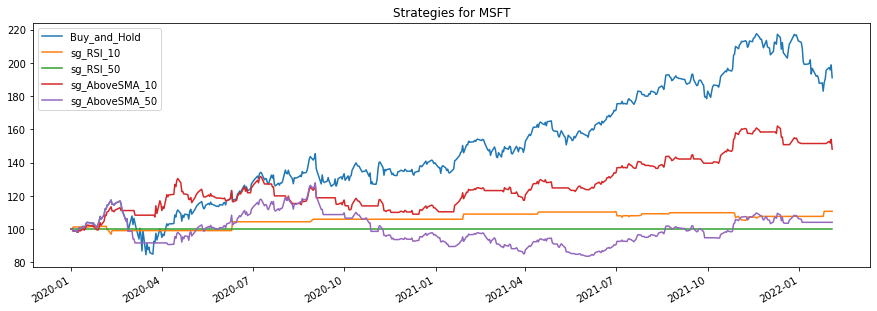

In [17]:
ticker='MSFT'
start='2020-01-01'
end='2022-02-04'

benchmark = buy_and_hold(df=df, ticker=ticker, signal_name='Buy_and_Hold', start=start, end=end)
sg_RSI_10 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_10', start=start, end=end)
sg_RSI_50 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_50', start=start, end=end)
sg_AboveSMA_10 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_10', start=start, end=end)
sg_AboveSMA_50 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_50', start=start, end=end)
# Run all backtests and plot the resutls
bt_results = bt.run(benchmark, sg_RSI_10, sg_RSI_50, sg_AboveSMA_10, sg_AboveSMA_50)
bt_results.plot(title='Strategies for {}'.format(ticker))

<AxesSubplot:title={'center':'Strategies for BTC-USD'}>

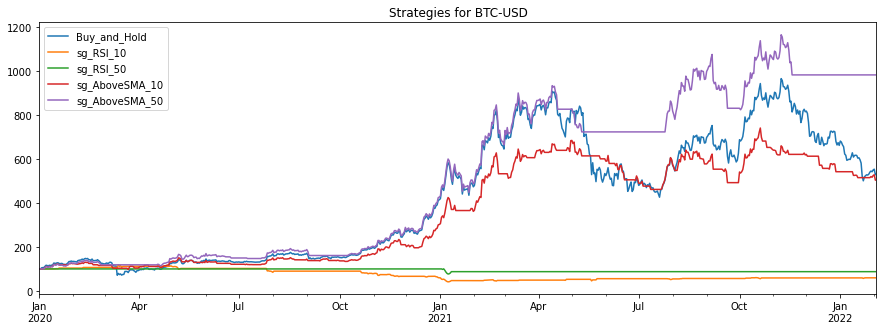

In [18]:
ticker='BTC-USD'
start='2020-01-01'
end='2022-02-04'

benchmark = buy_and_hold(df=df, ticker=ticker, signal_name='Buy_and_Hold', start=start, end=end)
sg_RSI_10 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_10', start=start, end=end)
sg_RSI_50 = signal_rever(df=df, ticker=ticker, signal_name='sg_RSI_50', start=start, end=end)
sg_AboveSMA_10 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_10', start=start, end=end)
sg_AboveSMA_50 = signal_trend(df=df, ticker=ticker, signal_name='sg_AboveSMA_50', start=start, end=end)
# Run all backtests and plot the resutls
bt_results = bt.run(benchmark, sg_RSI_10, sg_RSI_50, sg_AboveSMA_10, sg_AboveSMA_50)
bt_results.plot(title='Strategies for {}'.format(ticker))

In [38]:
test = {'a':1,'b':2}
test['b']

2

In [43]:
for i in bt_results.keys():
    print(i)

Buy_and_Hold
sg_RSI_10
sg_RSI_50
sg_AboveSMA_10
sg_AboveSMA_50


In [44]:
bt_results.prices

,Buy_and_Hold,sg_RSI_10,sg_RSI_50,sg_AboveSMA_10,sg_AboveSMA_50
2020-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,105.139621,100.000000,100.000000,100.000000,100.000000
2020-01-04,106.080167,100.000000,100.000000,100.894505,100.000000
2020-01-05,106.089615,100.000000,100.000000,100.903490,100.008853
...,...,...,...,...,...
2022-01-30,542.329478,59.525525,87.607971,517.317227,983.148438
2022-01-31,550.416463,59.525525,87.607971,525.008345,983.148438
2022-02-01,554.136586,59.525525,87.607971,528.546364,983.148438
2022-02-02,528.535452,59.525525,87.607971,504.198433,983.148438


In [37]:
bt_results['Buy_and_Hold'].prices

2020-01-01    100.000000
2020-01-02    100.000000
2020-01-03    105.139621
2020-01-04    106.080167
2020-01-05    106.089615
                 ...    
2022-01-30    542.329478
2022-01-31    550.416463
2022-02-01    554.136586
2022-02-02    528.535452
2022-02-03    531.418578
Name: Buy_and_Hold, Length: 765, dtype: float64

In [20]:
#http://pmorissette.github.io/ffn/ffn.html#ffn.core.GroupStats
bt_results.to_csv()


'Stat,Buy_and_Hold,sg_RSI_10,sg_RSI_50,sg_AboveSMA_10,sg_AboveSMA_50\nStart,2020-01-01,2020-01-01,2020-01-01,2020-01-01,2020-01-01\nEnd,2022-02-03,2022-02-03,2022-02-03,2022-02-03,2022-02-03\nRisk-free rate,0.00%,0.00%,0.00%,0.00%,0.00%\n,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nTotal Return,431.42%,-40.47%,-12.39%,404.20%,883.15%\nDaily Sharpe,1.20,-0.52,-0.42,1.47,1.92\nDaily Sortino,1.94,-0.69,-0.51,2.64,3.44\nCAGR,122.24%,-21.96%,-6.13%,116.72%,198.23%\nMax Drawdown,-53.06%,-65.43%,-23.42%,-32.55%,-25.38%\nCalmar Ratio,2.30,-0.34,-0.26,3.59,7.81\n,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nMTD,-3.45%,0.00%,0.00%,-3.96%,0.00%\n3m,-40.99%,0.95%,0.00%,-20.95%,-9.54%\n6m,-2.62%,9.09%,0.00%,-8.04%,25.90%\nYTD,-19.76%,0.95%,0.00%,-7.06%,0.00%\n1Y,-0.85%,26.70%,0.00%,23.13%,78.28%\n3Y (ann.),122.24%,-21.96%,-6.13%,116.72%,198.23%\n5Y (ann.),-,-,-,-,-\n10Y (ann.),-,-,-,-,-\nSince Incep. (ann.),122.24%,-21.96%,-6.13%,116.72%,198.23%\n,,,,,,,

In [21]:
bt_results.stats

,Buy_and_Hold,sg_RSI_10,sg_RSI_50,sg_AboveSMA_10,sg_AboveSMA_50
start,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00
end,2022-02-03 00:00:00,2022-02-03 00:00:00,2022-02-03 00:00:00,2022-02-03 00:00:00,2022-02-03 00:00:00
rf,0.0,0.0,0.0,0.0,0.0
total_return,4.314186,-0.404745,-0.12392,4.041984,8.831484
cagr,1.222357,-0.219647,-0.06129,1.167189,1.982272
max_drawdown,-0.530556,-0.654282,-0.234244,-0.325499,-0.253799
calmar,2.303919,-0.335707,-0.26165,3.585851,7.810413
mtd,-0.034515,0.0,0.0,-0.039637,0.0
three_month,-0.409915,0.009526,0.0,-0.209506,-0.095397
six_month,-0.026163,0.090916,0.0,-0.080446,0.259021
